# 

# Problem Statement:

Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.

# About Dataset

### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Content

There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)


## Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from imblearn.combine import SMOTETomek
from collections import Counter

from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Import dataset
df = pd.read_csv('UCI_Credit_Card.csv')
pd.set_option("display.max_columns",None)

In [3]:
#checking first five rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#checking last five rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
#shape of dataset
df.shape

(30000, 25)

In [6]:
#checking the data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
#checking for duplicate rows
df.duplicated().sum()

0

#### There is no duplicate row and there is no null value

In [8]:
#checking correlation between columns
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [9]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [10]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [11]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [12]:
df = df.rename(columns={'default.payment.next.month': 'default_status',
                       'PAY_0' : 'PAY_1'})

In [13]:
df = df.drop(['ID'],axis=1)

In [14]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Data exploration
We have already had a feel of the dataset in the first few cells, let's have a better one while also exploring some very basic techniques.

# Categorical variables
That are SEX, MARRIAGE, EDUCATION, I want to see both how our dataset is divided and if there are sparse classes which can cause overfit of our models.

In [15]:
#function to get value_counts corresponding to unique categories
def get_unique_categories(data):
    for column in data:
        print(column,'\n-------')
        print(data[column].value_counts(dropna=True))
        print('='*27)
        
#value_count_df
get_unique_categories(data = df)

LIMIT_BAL 
-------
50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64
SEX 
-------
2    18112
1    11888
Name: SEX, dtype: int64
EDUCATION 
-------
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
MARRIAGE 
-------
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
AGE 
-------
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
6

# Data Cleaning
1. As seen previously, some categories are mislabeled or undocumented. Before proceeding, it is time to fix it.

2. The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

3. The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)



Thus is a good occasion to learn how to use the .loc function

In [16]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4

df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

##### "Other" in education can be an education lower than the high school level.
##### "Other" in marriage could be, for example, "divorced".

According to our documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly"with -1. Then what is -2? And what is 0? It seems to me the label has to be adjusted to 0 for pay duly.

In [17]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

Next, I am puzzled by how wide is the range of possible values in the features regarding money, so let's see, for example the PAY_AMT1 that are anomalous.

In [18]:
df[df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'default_status']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,default_status
2687,500000.0,0,0,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,0,0,405016.0,405016.0,6500.0,0
12330,300000.0,1,0,324392.0,505000.0,-165580.0,0
25431,170000.0,0,0,167941.0,304815.0,30860.0,0
28003,510000.0,0,0,481382.0,493358.0,71121.0,0
28716,340000.0,0,0,176743.0,873552.0,139808.0,0
29820,400000.0,1,0,394858.0,423903.0,396343.0,0
29867,340000.0,0,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,0,322228.0,323014.0,348392.0,0


In [19]:
df[df.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'default_status']]
# doesn't look weird after all

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,default_status
2592,480000.0,0,0,339176.0,344261.0,38929.0,0
3774,500000.0,0,0,301441.0,302961.0,39356.0,0
5296,500000.0,0,0,1664089.0,1684259.0,-18088.0,0
5400,500000.0,0,0,385228.0,385228.0,8970.0,0
6150,300000.0,0,0,4735.0,344467.0,-5973.0,1
6864,500000.0,0,0,444462.0,300018.0,201402.0,0
9044,500000.0,0,0,384973.0,384986.0,24201.0,0
11568,430000.0,0,0,354716.0,358689.0,960.0,1
11853,360000.0,1,0,338600.0,361560.0,-22960.0,0
12829,340000.0,0,0,330510.0,312723.0,335584.0,1


A quick check on all the others reveal that they are not outliers but simply clients with a lot of money.

However, I will keep this in mind in case of algorithms sensible to scales.

### Further analysis

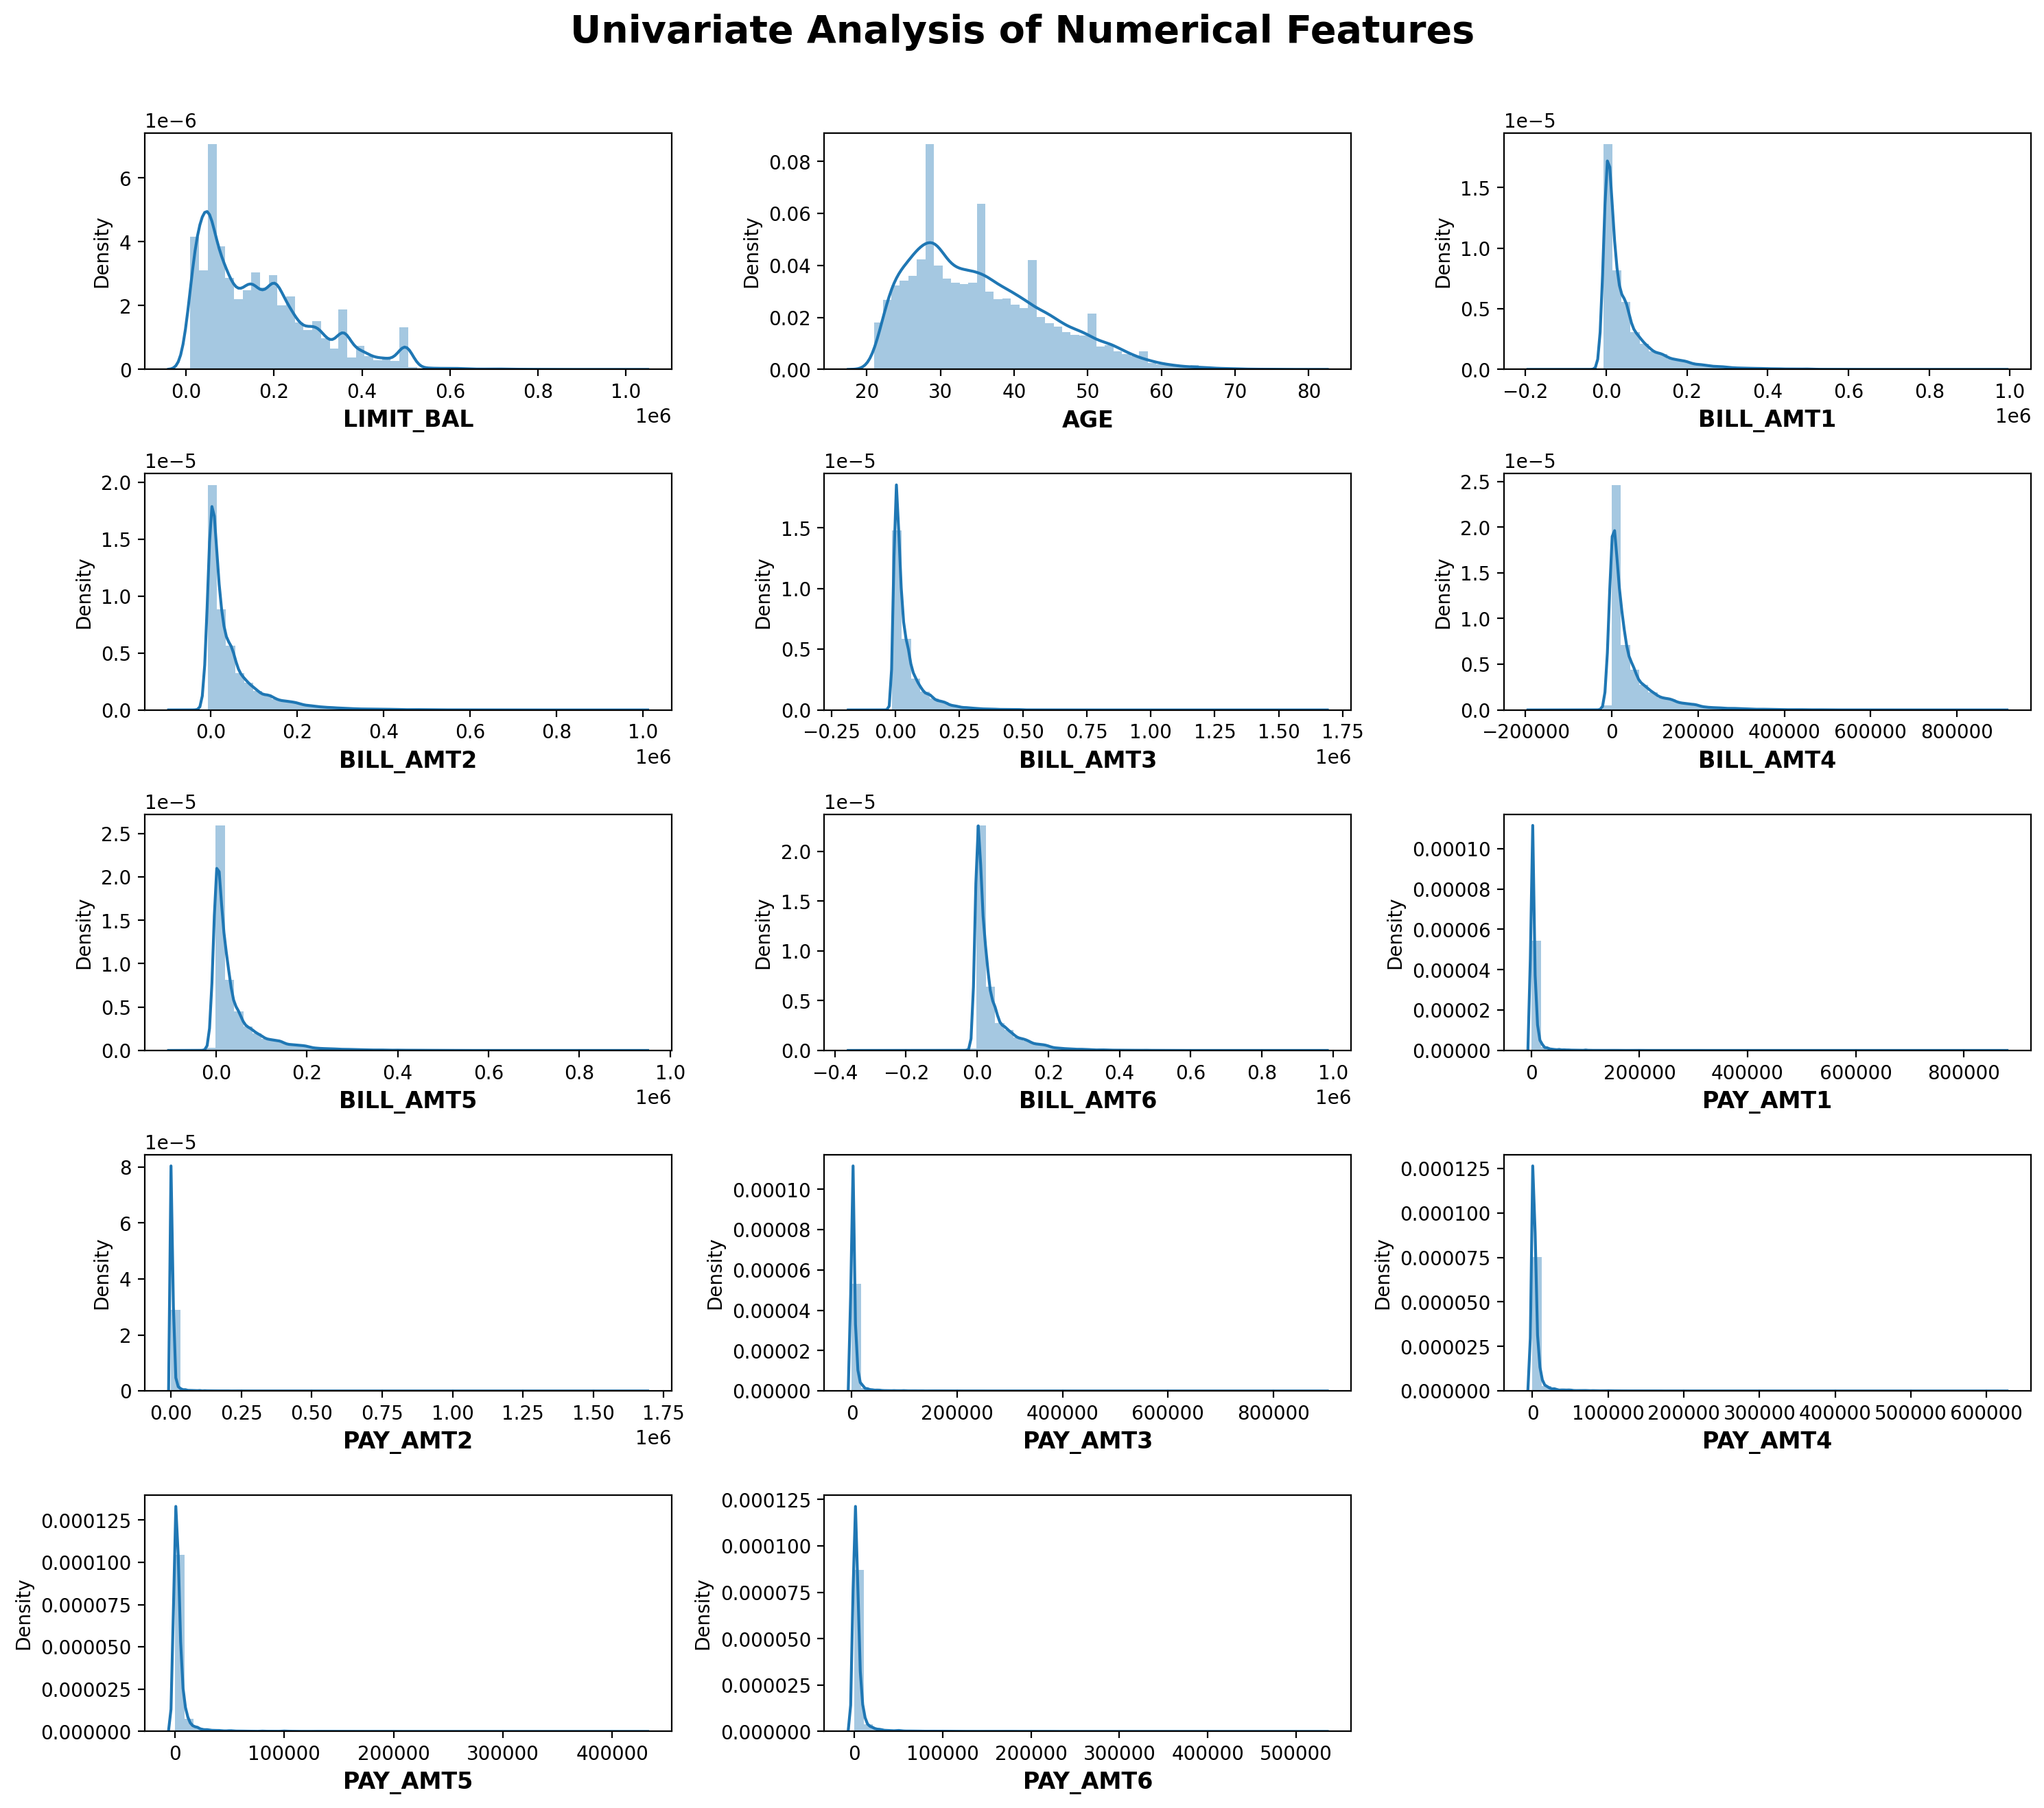

In [20]:
num_fea=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
def univariate_distplot_numerical(df):
    plt.figure(figsize=(15, 15),dpi=200)
    plt.suptitle('Univariate Analysis of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in num_fea:
        plt.subplot(6,3,i+1)
        sns.distplot(x = df[col])
        plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
        plt.tight_layout()
        i+=1
            
univariate_distplot_numerical(df)

1. As per the above plot most of the features are not normally distributed.
2. Transformation of data is not of prime importance since it is a classification problem.

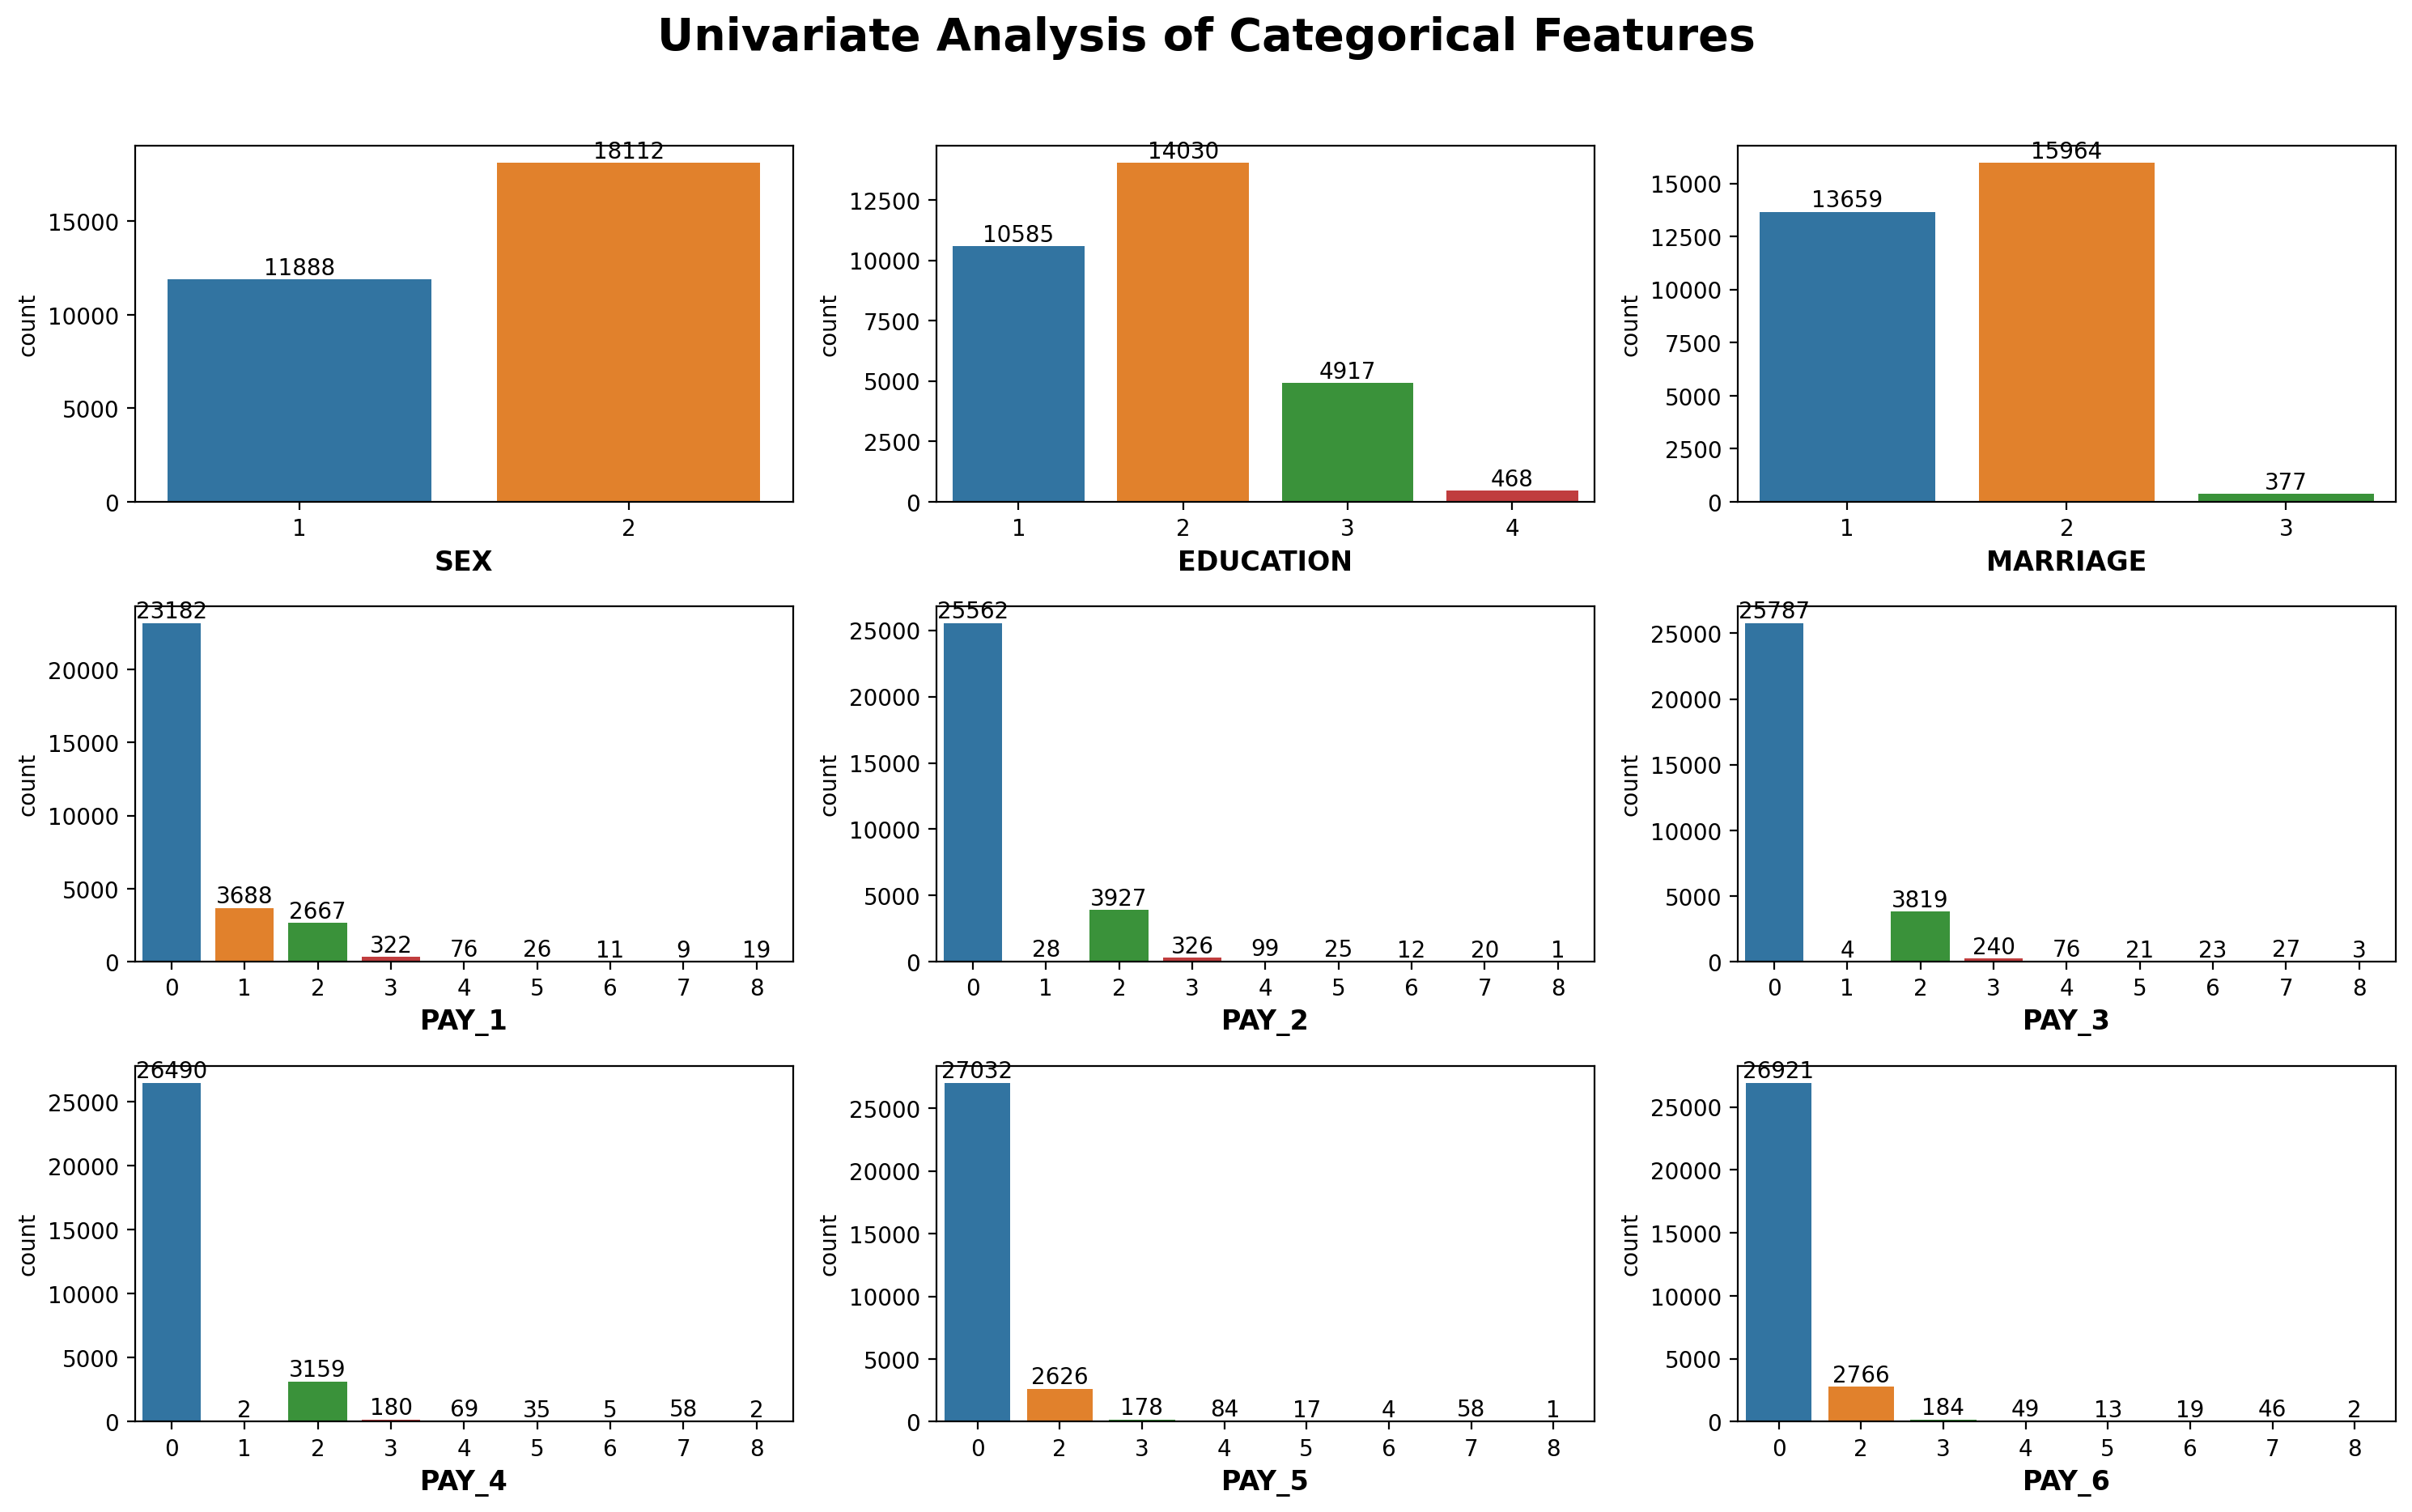

In [21]:
cat_fea=['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
def univariate_plot_categorical(df):
    plt.figure(figsize=(15, 20),dpi=200)
    plt.suptitle('Univariate Analysis of Categorical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in cat_fea:
        plt.subplot(7,3,i+1)
        ax = sns.countplot(x = col,data=df)
        plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
        plt.tight_layout()
        i+=1
        for p in ax.containers:
            ax.bar_label(p,padding=0)
            
univariate_plot_categorical(df)

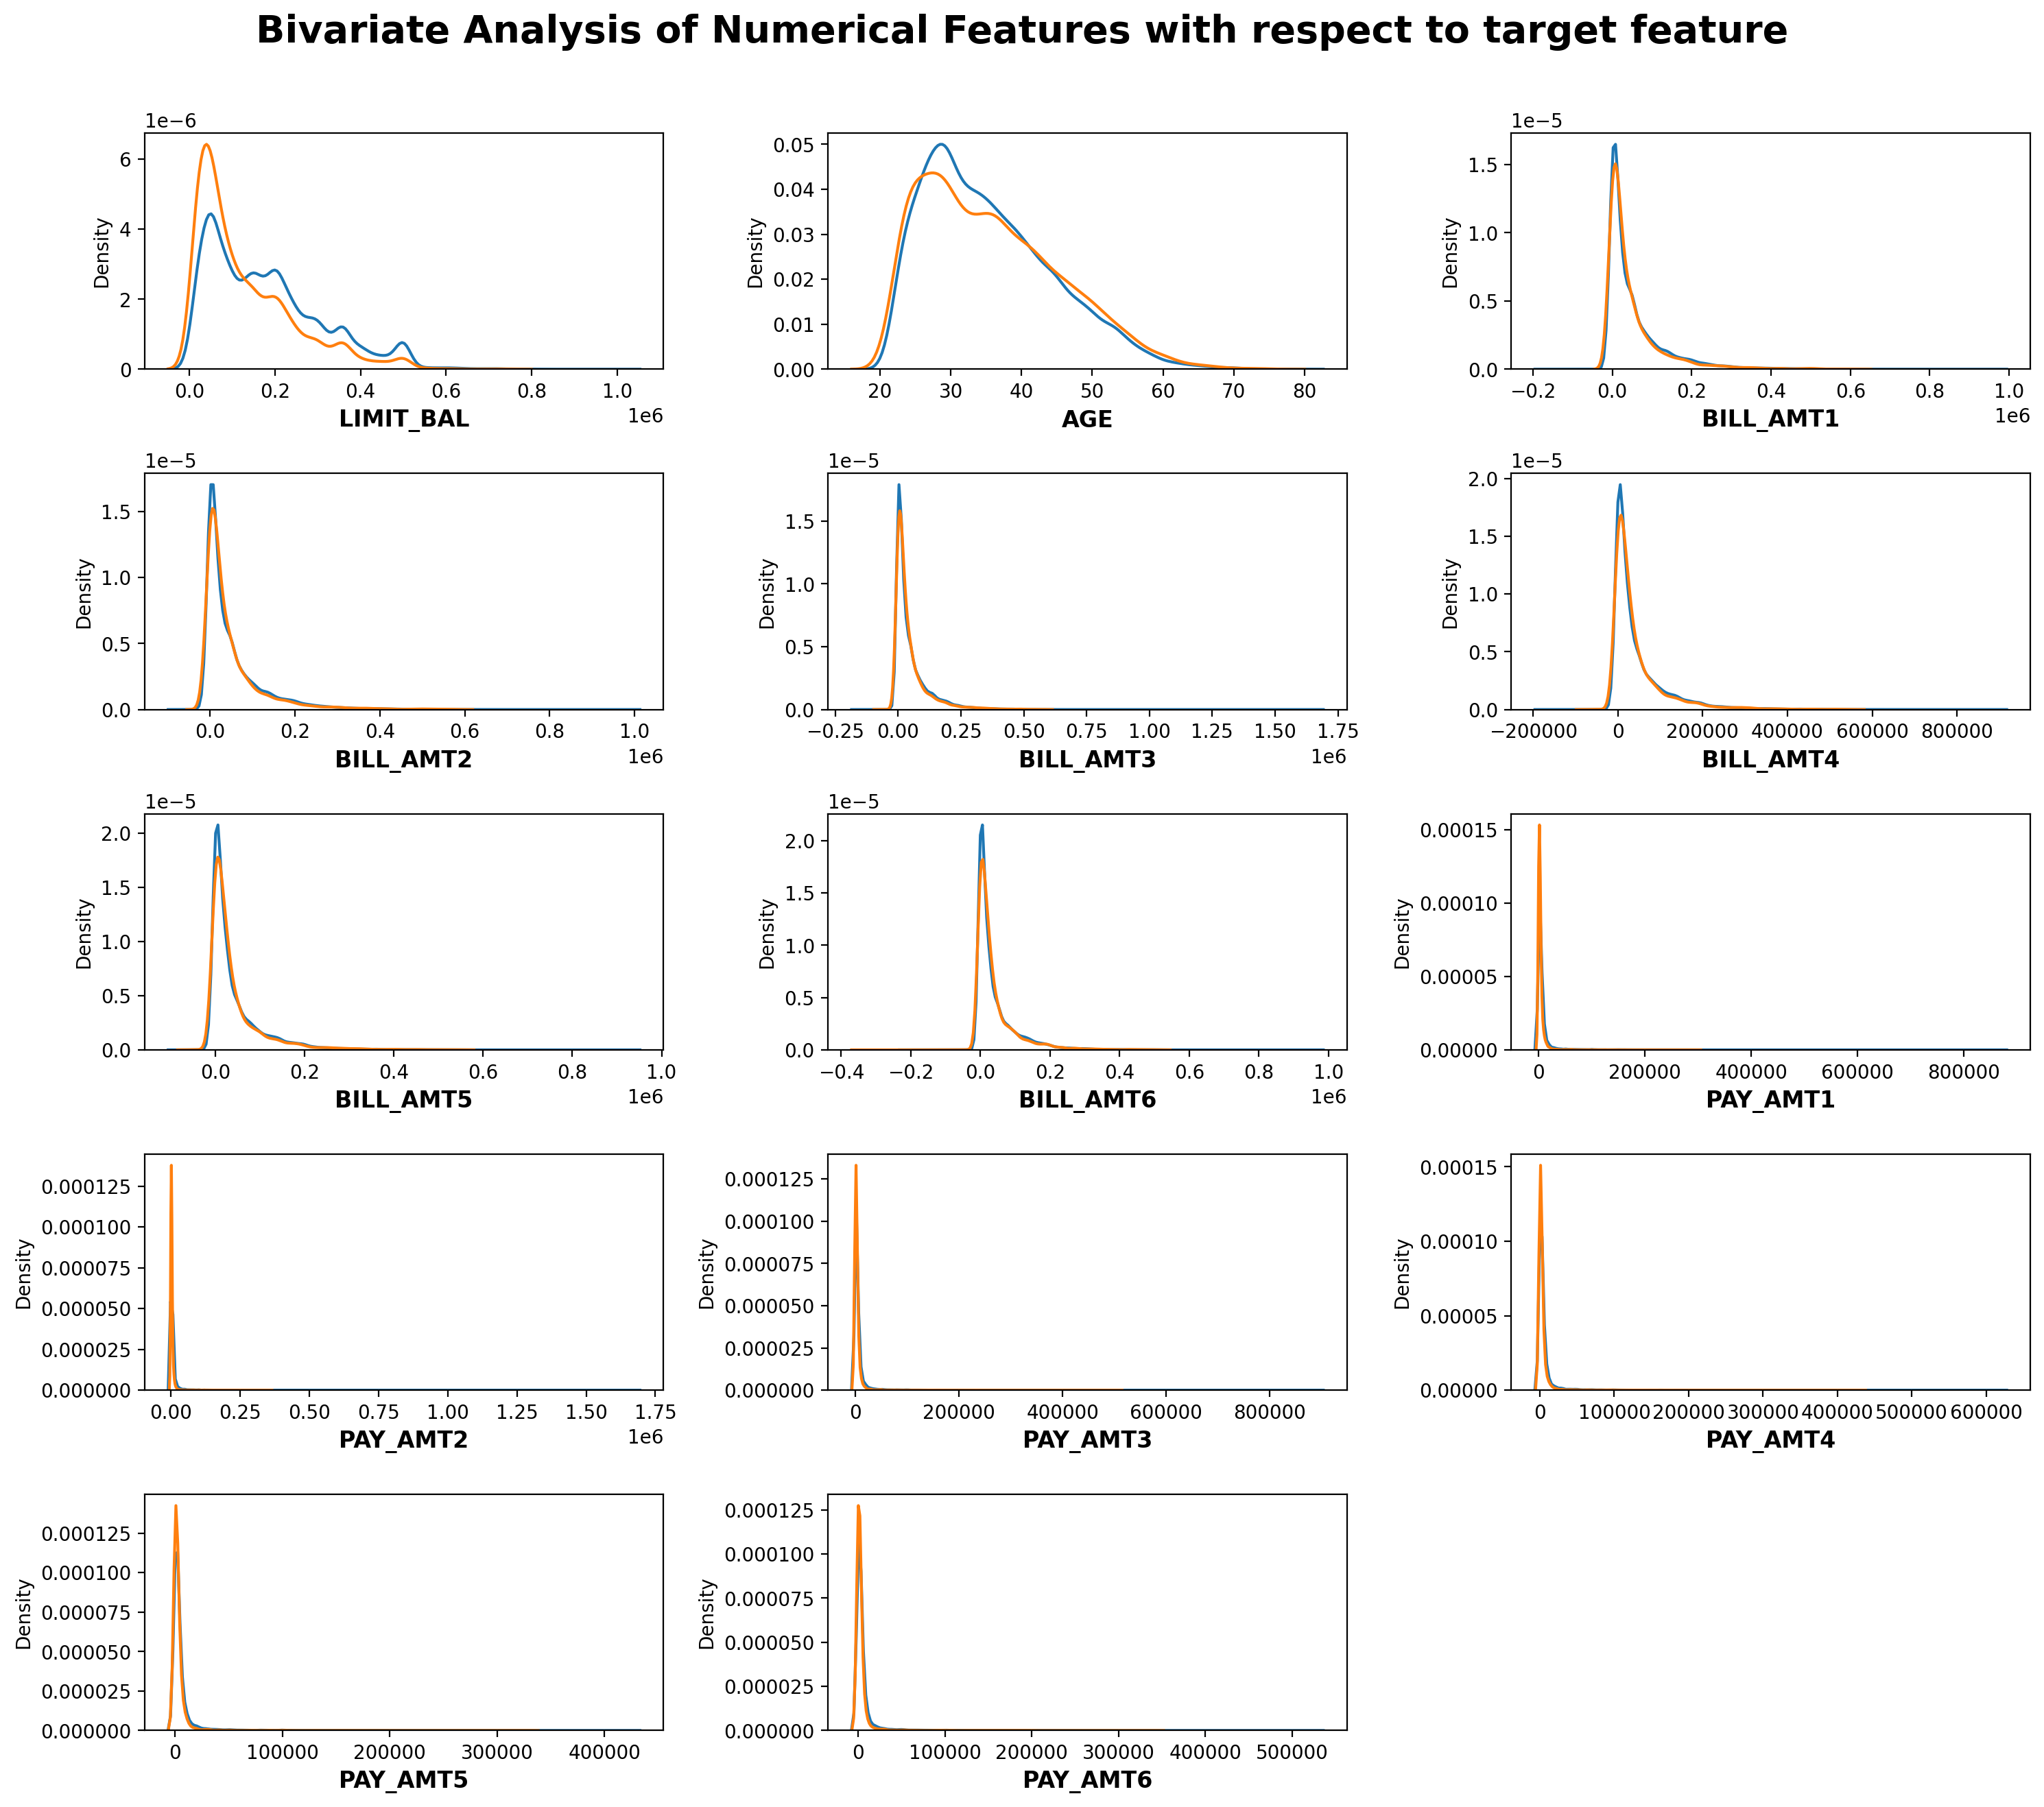

In [22]:
num_fea=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
def Bivariate_distplot_numerical(df):
    plt.figure(figsize=(15, 15),dpi=200)
    plt.suptitle('Bivariate Analysis of Numerical Features with respect to target feature',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in num_fea:
        plt.subplot(6,3,i+1)
        sns.distplot(df[df['default_status']==0][col],hist=False)
        sns.distplot(df[df['default_status']==1][col],hist=False)
        plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
        plt.tight_layout()
        i+=1

Bivariate_distplot_numerical(df)

Distribution is quite similar for numerical features in both classes

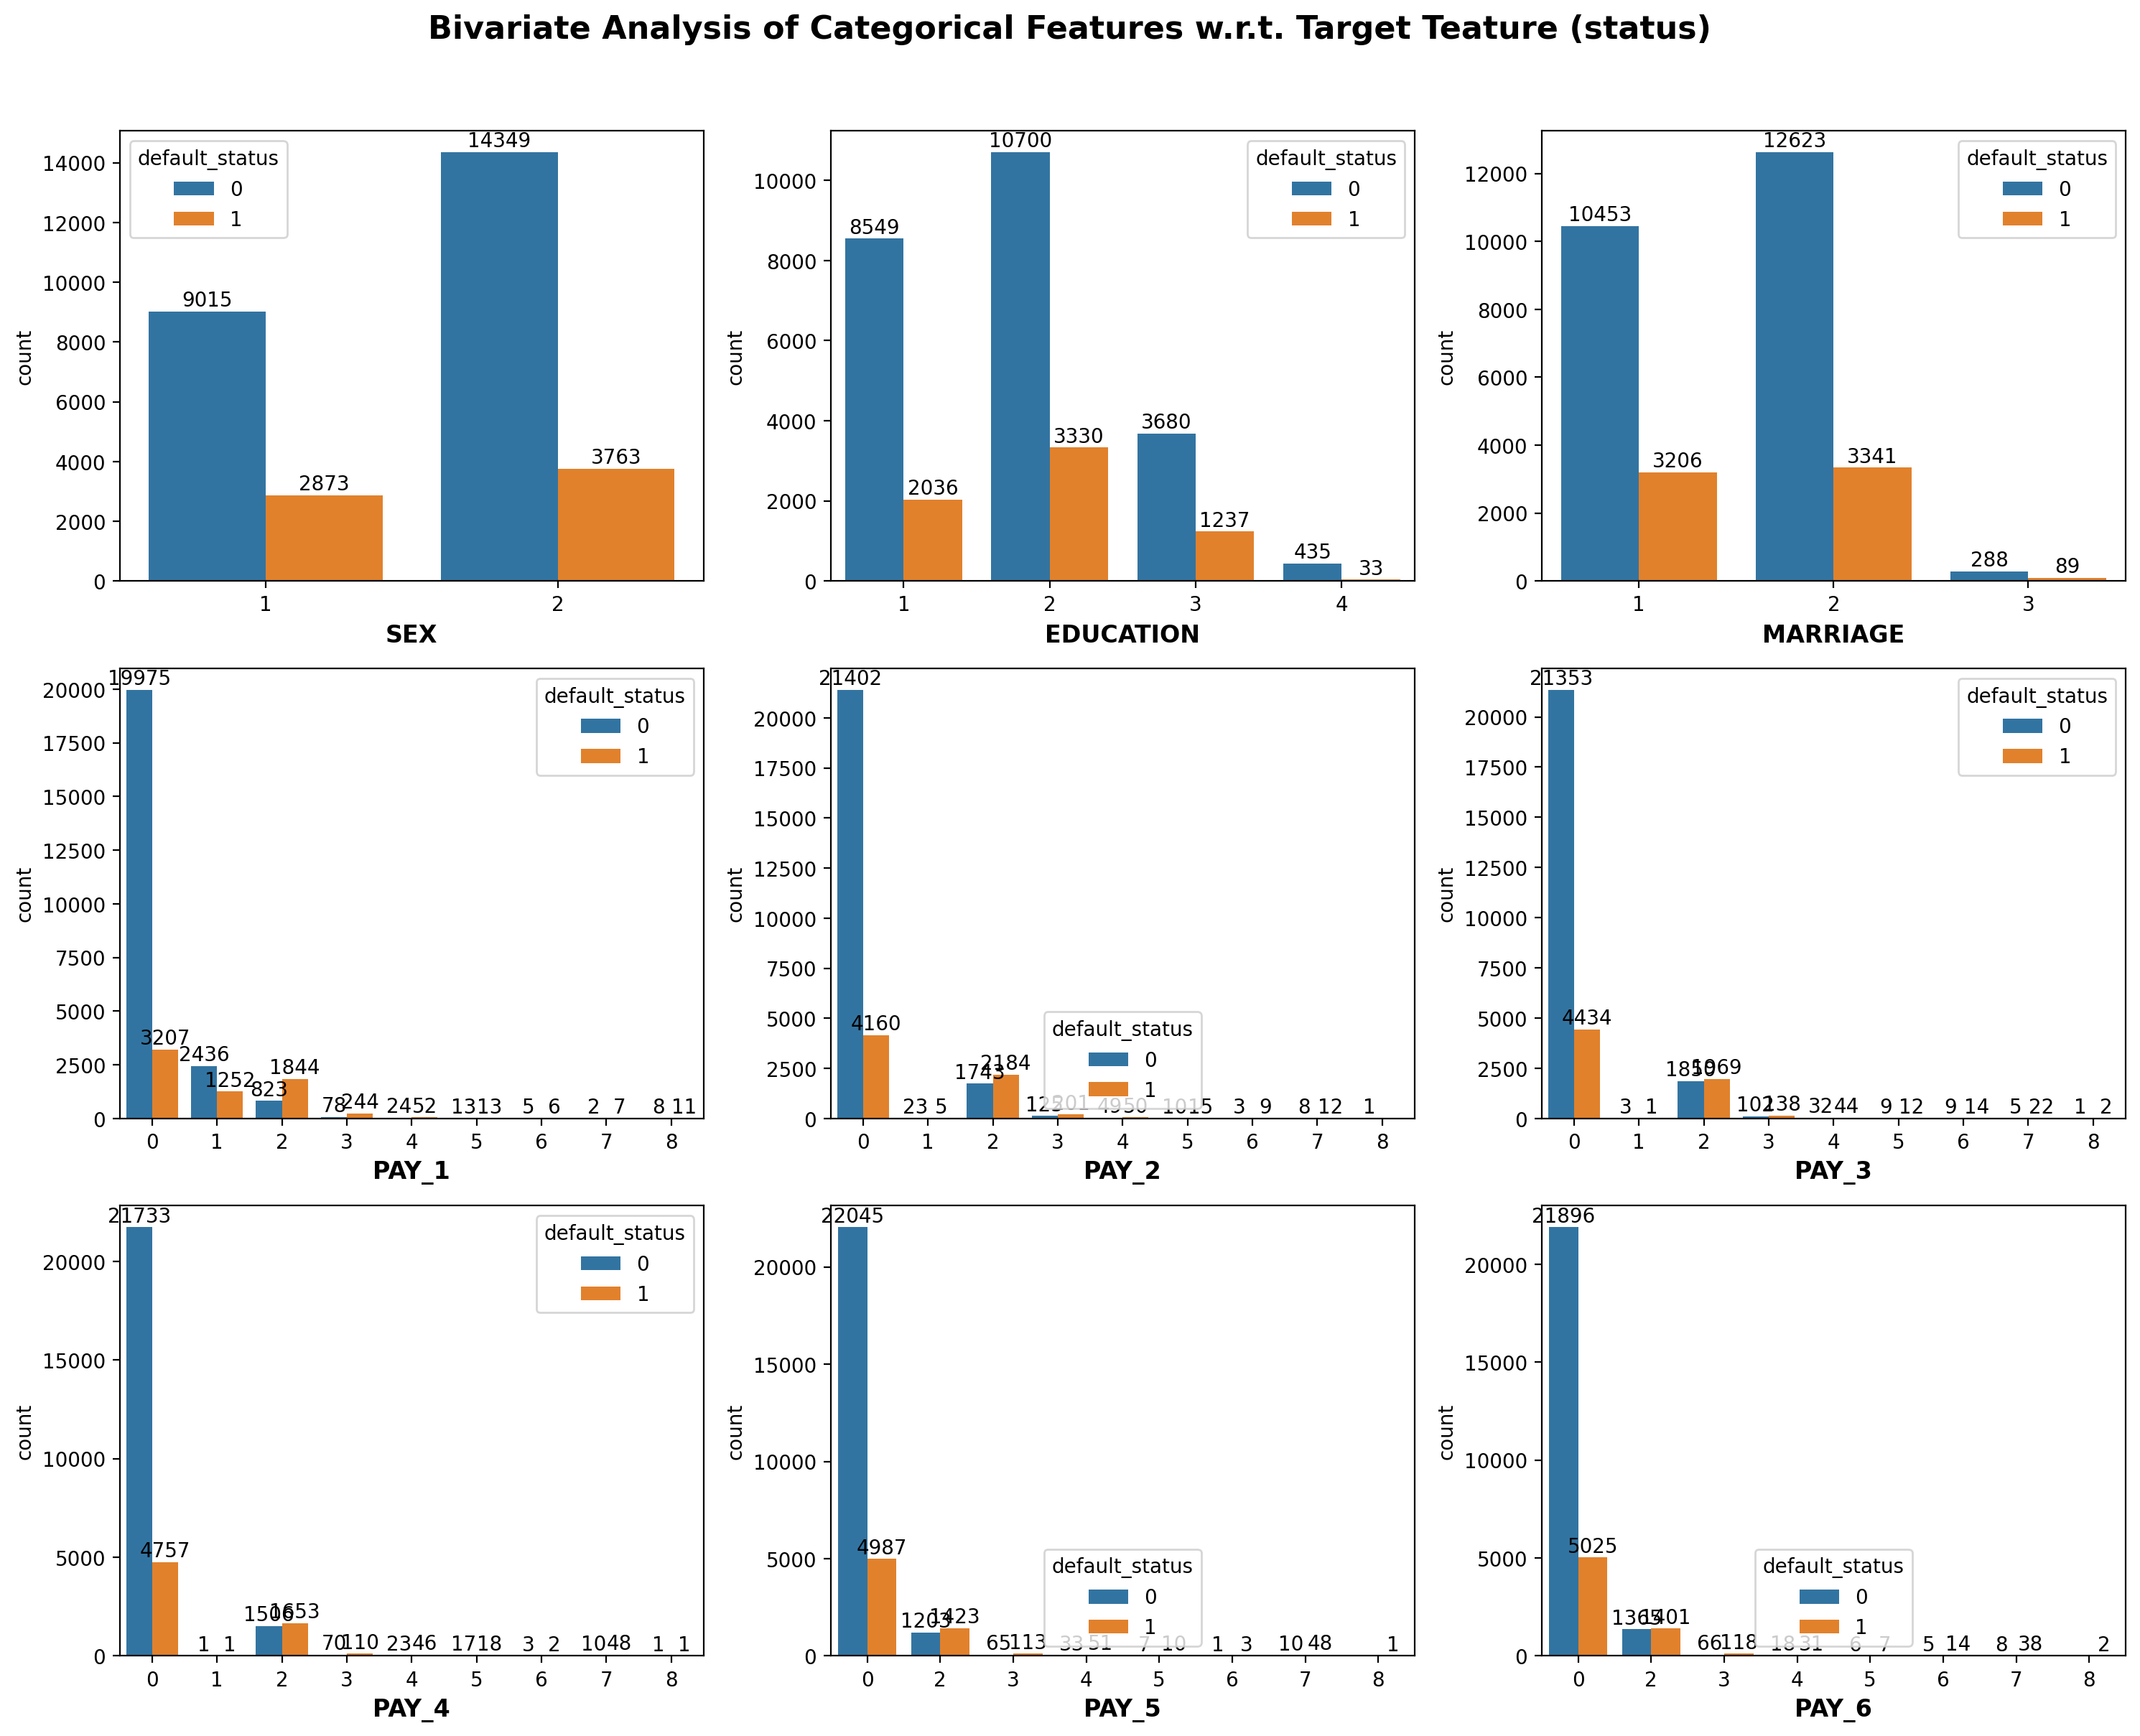

In [23]:
cat_fea=['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
plt.figure(figsize=(15, 30),dpi = 200)
plt.suptitle('Bivariate Analysis of Categorical Features w.r.t. Target Teature (status)',fontsize = 16, fontweight = 'bold',alpha = 1, y = 1.01)

i = 1
for col in cat_fea:
    plt.subplot(8,3,i)
    ax = sns.countplot(x = col, data = df, hue = 'default_status') #display mean value of Bike count per hour per category 
    plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
    plt.tight_layout()
    i+=1
    for p in ax.containers:
        ax.bar_label(p,padding=0.5)
plt.show()

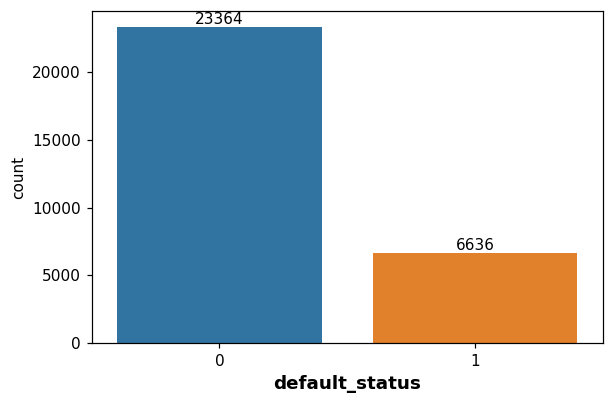

In [24]:
#count of each class in target featurel
plt.figure(figsize=(6, 4),dpi=110)
ax = sns.countplot(x = 'default_status',data=df)
plt.xlabel('default_status', fontdict={'fontsize':12,'fontweight':'bold'})
for p in ax.containers:
                ax.bar_label(p,padding=0)

###### Observation:

The plots are displaying highly non uniform distribution of default_status(target feature) among other independent features. which implies that the dataset is highly imbalanced and it will lead to biased results.

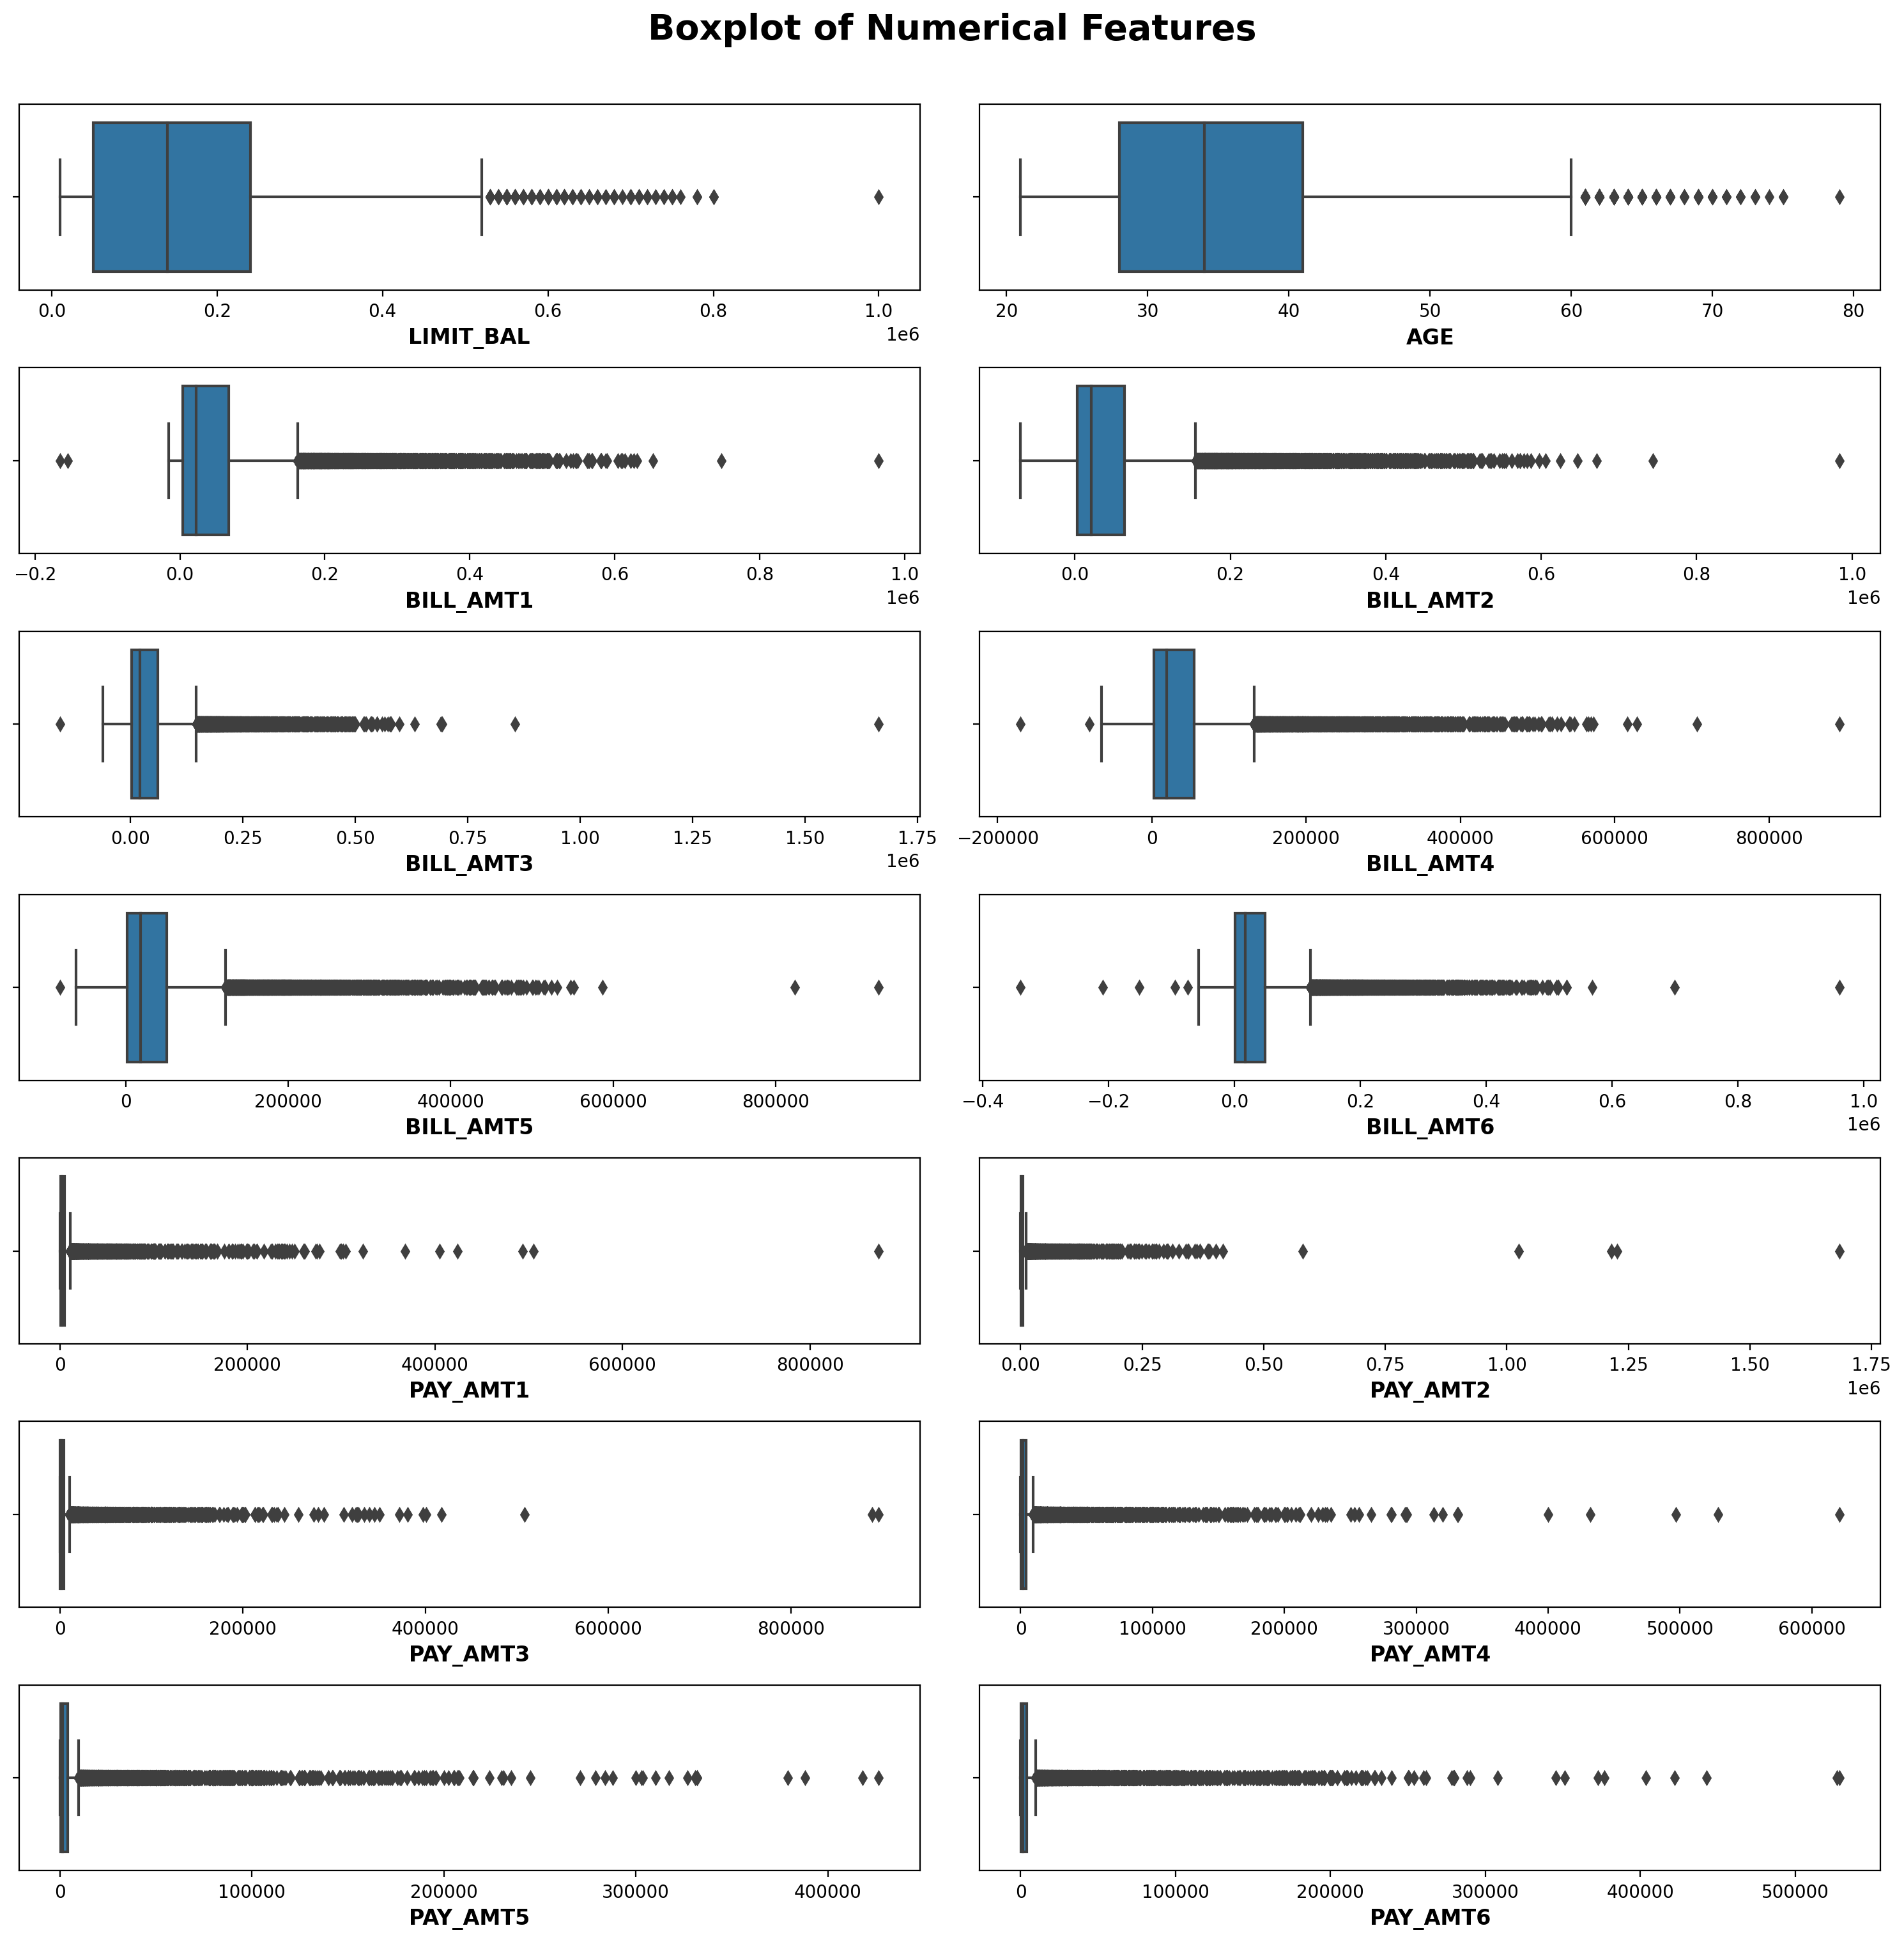

In [25]:
num_fea=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
def boxplot(df):
    plt.figure(figsize=(15, 15),dpi=200)
    plt.suptitle('Boxplot of Numerical Features',fontsize = 20, fontweight = 'bold',alpha = 1, y = 1.01)

    i = 0
    for col in num_fea:
        plt.subplot(7,2,i+1)
        sns.boxplot(x = df[col])
        plt.xlabel(col, fontdict={'fontsize':12,'fontweight':'bold'})
        plt.tight_layout()
        i+=1
            
boxplot(df)

##### Observation:
Outliers are observed in almost all the numerical features which may be helpful to us while model training. so, let's not remove these outleirs.

Feature Engineering
In this section we will perform the following tasks:

1. Handling missing values:
There are number of ways to deal with missing values


In deletion, the particular feature or row having huge number of missing values are removed.

In imputation, the missing values are imputed using some techniques such as:

A. Univariate imputation techniques:
the missing values are replaced using the balance data of that particular feature. Most famous and simple methods are Mean,Median and Mode. Out of which mean and median are used for numerical feature imputation whereas mode is used for categorical feature imputation.
B. Multivariate imputation techniques:
In this feature are imputed based on their relation with other features. Most used imputation techniques are:
KNN Imputer: KNN algorithm is used for feature imputation. it is suitable for both categorical as well as numerical features.
Iterative Imputation: MICE(Multiple Imputation by Chained Equation) technique is used under this imputation. in this any machine learning algorithm can be used for multiple iteration and imputing the features. it is suitable for both categorical as well as numerical features.
2. Handling outliers:
Oulier may impact the performance of the models but sometime they might be helpul. most commonly used techniques for treating outliers are:

Z-score: we use the concept of standard normal distribution. every value outside -3 to +3 is treated as outlier and can be treated depending upon the problem we are trying to solve


IQR method: we use the concept of inter quartile range. every value outside range of lower limit to upper limit is treated as outlier and can be treated depending upon the problem statement


Percentile method: Based on problem statement and domain knowledge, we can choose the upper and lower limit for outlier treatment using percentile method
3. Categorical features encoding
Model do understand numerical values only, hence categorical features needs to be converted into numerical values. most common methods are given below:
One Hot Encoding
Label Encoding
Ordinal Encoding
Count of Frequency Encoding
Target Guided Ordinal Encoding
Probability Ratio Encoding
4. Feature scaling
Every feature is scaled to same range for having better results.

In [26]:
#split dataset into dependent and independent features
X = df.drop(['default_status'],axis=1)
y = df['default_status']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)


Shape of X_train: (22500, 23)
Shape of X_test: (7500, 23)


In [28]:
pipline_steps = [('feature_scaler',RobustScaler())]

#create an object of pipeline
pipeline = Pipeline(pipline_steps)   



In [29]:
#runnig all the steps in pipeline altogether 
X_train_trf = pipeline.fit_transform(X_train)
y_train_trf = y_train

#create dataframe of transformed X_train
pd.DataFrame(X_train_trf).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.842105,-1.0,1.0,0.0,-0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.931807,1.026339,1.131102,1.300118,1.427338,1.499534,0.474407,0.480661,0.559611,0.484392,0.527287,0.517833
1,-0.631579,-1.0,0.0,0.0,-0.769231,0.0,0.0,0.0,0.0,0.0,0.0,-0.102586,-0.070044,0.263363,-0.082644,-0.023194,-0.062966,-0.196504,0.024498,0.535280,1.210980,0.659109,-0.343323
2,-0.263158,0.0,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,-0.309835,-0.304726,-0.351741,-0.366542,-0.372070,-0.355777,0.141573,-0.484764,-0.437956,-0.403660,-0.395465,-0.388375
3,0.842105,0.0,0.0,-1.0,0.461538,1.0,0.0,0.0,0.0,0.0,0.0,-0.352148,-0.349088,-0.351741,-0.366542,-0.372070,-0.355777,-0.524345,-0.484764,-0.437956,-0.403660,-0.395465,-0.388375
4,-0.368421,0.0,0.0,0.0,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.727143,0.779730,0.686979,0.199824,0.222879,0.256786,0.309613,0.008568,-0.006569,-0.085845,-0.075138,-0.052560


In [30]:
#runnig all the steps in pipeline altogether 
X_test_trf = pipeline.transform(X_test)
y_test_trf = y_test

#create dataframe of transformed X_train
pd.DataFrame(X_test_trf).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,-0.578947,-1.0,0.0,0.0,-0.692308,0.0,0.0,0.0,0.0,0.0,0.0,-0.211517,-0.181721,-0.148421,-0.123488,-0.089158,-0.047279,-0.149813,-0.002052,-0.072993,0.000000,0.000000,0.129458
1,0.052632,0.0,-1.0,0.0,-0.615385,0.0,0.0,0.0,0.0,0.0,0.0,1.817223,1.740933,1.696802,1.596072,1.231449,1.251705,0.595755,0.537380,0.331144,0.308665,0.308199,0.302673
2,-0.368421,0.0,1.0,-1.0,-0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.760365,0.799957,0.851394,0.981133,1.074069,1.104987,0.082647,0.266337,0.291971,0.252422,0.263644,0.272898
3,-0.052632,-1.0,1.0,0.0,1.153846,0.0,0.0,0.0,0.0,0.0,0.0,-0.024084,-0.033783,-0.067820,-0.040061,-0.140311,-0.211307,-0.122347,-0.048392,1.268613,-0.396394,1.452940,0.752929
4,-0.473684,0.0,0.0,0.0,0.153846,0.0,0.0,0.0,0.0,0.0,2.0,1.142816,0.443251,0.391963,0.011641,0.046544,0.048653,-0.024969,-0.122730,-0.194647,0.080732,-0.395465,-0.129458


Handle Imbalances

There are two methods to overcome this imbalanced dataset 1. reducing the frequency or data of majority class by removing. 2. Increasing the data set of minority class by duplication.

In first case (Reducing majority class) : the disadvantage is that important meaning ful data is also removed along with that.Advantage of that is reduced data thus resulting in increased speed and flexibility.

In second case (Increasing the minority class): randomly selecting the minority class values and duplicating them. Adv No information loss. Increase the no. of values of minority class. Disadv Since they data are replicated they cause overfitting of the model.

This could be overcome using oversampling and undersampling i.e., SMOTETomek method

In [31]:
smt = SMOTETomek(sampling_strategy='minority',random_state=0)
X_train_smt,y_train_smt = smt.fit_resample(X_train_trf,y_train_trf)

print(f'The number of class before fit: {Counter(y_train_trf)}')
print(f'The number of class after fit: {Counter(y_train_smt)}')

The number of class before fit: Counter({0: 17491, 1: 5009})
The number of class after fit: Counter({0: 17218, 1: 17218})


Model Building
While training the model, we will check the performance of the model using performance metrics such as accuracy score,precision score, recall score and recall score by use of confusion metrix.
a.png

Performance metrics:
1. Accuracy:

The overall accuracy of a model is simply the number of correct predictions divided by the total number of predictions. An accuracy score will give a value between 0 and 1, a value of 1 would indicate a perfect model


2. Recall (aka Sensitivity):

Recall is defined as the ratio of the total number of correctly classified positive classes divide by the total number of positive classes. Or, out of all the positive classes, how much we have predicted correctly. Recall should be high.


3. Precision:

Precision is defined as the ratio of the total number of correctly classified positive classes divided by the total number of predicted positive classes. Or, out of all the predictive positive classes, how much we predicted correctly. Precision should be high.


4. F1 score:

It is difficult to compare two models with different Precision and Recall. So to make them comparable, we use F-Score. It is the Harmonic Mean of Precision and Recall. As compared to Arithmetic Mean, Harmonic Mean punishes the extreme values more. F-score should be high.


5. Specificity:

Specificity determines the proportion of actual negatives that are correctly identified.



In [32]:
models = {'Logistic Regression':LogisticRegression(),
          'KNN Classifier' : KNeighborsClassifier(),
          'DecisionTreeClassifier' : DecisionTreeClassifier(),
          'RandomForestClassifier' : RandomForestClassifier(),
          'XGBClassifier' : XGBClassifier()}

In [33]:
def compare_models(models:dict):
    
    metrics = {'Models':models.keys(),'accuracy_train':[],'accuracy_test':[],'precision_train':[],'precision_test':[],
               'recall_train':[],'recall_test':[],'f1_score_train':[],'f1_score_test':[]}
    
    for model in models.values():
        #create an object of model
        model_object = model
        
        #fit the model to train dataset 
        model_object.fit(X_train_smt,y_train_smt)
        
        
        #predict the output on test dataset
        y_train_pred = model_object.predict(X_train_smt)
        y_test_pred = model_object.predict(X_test_trf)
        
        #calculate accuracy on train and test dataset
        accuracy_train = accuracy_score(y_train_smt,y_train_pred)
        accuracy_test = accuracy_score(y_test_trf,y_test_pred)
        
        #calculate precision on train and test dataset
        precision_train = precision_score(y_train_smt,y_train_pred,average='macro')
        precision_test = precision_score(y_test_trf,y_test_pred,average='macro')
        
        #calculate recall on train and test dataset
        recall_train = recall_score(y_train_smt,y_train_pred,average='macro')
        recall_test = recall_score(y_test_trf,y_test_pred,average='macro')
        
        #calculate f1_score on train and test dataset
        f1_score_train = f1_score(y_train_smt,y_train_pred,average='macro')
        f1_score_test = f1_score(y_test_trf,y_test_pred,average='macro')
        
        
        #append accurcay list
        metrics['accuracy_train'].append(accuracy_train)
        metrics['accuracy_test'].append(accuracy_test)
       
        #append precision list
        metrics['precision_train'].append(precision_train)
        metrics['precision_test'].append(precision_test)
        
        #append recall list
        metrics['recall_train'].append(recall_train)
        metrics['recall_test'].append(recall_test)
        
        #append f1_score list
        metrics['f1_score_train'].append(f1_score_train)
        metrics['f1_score_test'].append(f1_score_test)
    
    #creata a dataframe of resulted metrics of different models
    models_metrics = pd.DataFrame(metrics)
    
    return models_metrics

In [34]:
models_without_tuning = compare_models(models)

In [35]:
#models metrics with default parameters
models_without_tuning

,Models,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1_score_train,f1_score_test
0,Logistic Regression,0.702811,0.777333,0.720779,0.681357,0.702811,0.700744,0.696639,0.689436
1,KNN Classifier,0.864996,0.658133,0.882318,0.604078,0.864996,0.646628,0.863449,0.598133
2,DecisionTreeClassifier,0.999710,0.715600,0.999710,0.609975,0.999710,0.628666,0.999710,0.615906
3,RandomForestClassifier,0.999681,0.791867,0.999681,0.689389,0.999681,0.673142,0.999681,0.680265
4,XGBClassifier,0.921187,0.804667,0.924288,0.708943,0.921187,0.655098,0.921043,0.672639


# Project Summary
### Let Summarize all the steps teken in this project.
###### 1. Overview of the overall dataset such as
The overall dataste consist of 30000 rows and 25 columns.
Number of columns removed in beginning are 1 ('id').
All the columns are numerical
Checked the uniques categories and their repective value count in dataset.
###### 2. Checked for missing values and outliers
Total missing values in dataset are 0
Outliers are checked using boxplot and are observed in almost every numerical feature. but that might be important for model training purpose. so i have not removed.
###### 3. Exploratory Data Analysis
Univariate Analysis
Checked distribution of nuemrical and catgorical features. None of the numerical feature was normally distributed which may be due to the presence of the outliers.
Multivariate Analysis
Checked the behaviour of independent catgorical and numerical features with respect to target feature (status), which indicated that dataset in imbalanced.
###### 4. Feature Engineering
The feature engineering has been done using Sklearn Pipeline which consist of numer of steps such as:

Numerical features imputation : Iterative imputation (MICE imputation) technique is used to impute numerical featues and the algorithm used in this technique was Decision Tree Regressor for numerical features.

Categorical features imputation : Iterative imputation (MICE imputation) technique is used to impute categorical features and the algorithm used in this technique was Decision Tree Classifier for categorical features.

Categorical feautre encoding : Every categorical present in this dataset is hvaing 2 - 3 unique feature which needs to be converted into numerical values by using some techniques because the model doesn't understand categorical values.

Feature Scaling : In this every is brought down to same range so that model can perform efftectively
###### 5. Handling Imbalances
The number of class originally present in dataset are {0: 17491, 1: 5009} which will lead to biased result because occurance of 0 class almost 3 times more than class 1. To have a correct prediction, i have resampled the train dataset using SMOTETomek technique which balanced both the classes and the number of class after resampling became {0: 17218, 1: 17218}
###### 6. Model Building
Models used are:

Logistic Regression

KNN Classifier

DecisionTreeClassifier

RandomForestClassifier

RandomForestClassifier

XGBClassifier

Performance metrics like accuracy, precision, recall were checked.

# Conclusion
Recalling the problem statement,  The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.

Also, if we talk about the confusion matrix, it become more important to keep the False Negative(FN) as minimum as possible. because, FN indiactes the default case predicted as not-default which become criitcal as banks earn a major revenue from lending loans and no doubt, it is often associated with risk.

Therefore keeping above scenerio in mind, i have checked out Accuracy and Recall value in all the models and after careful observation, XGBClassifier comes out to be the best model for this problem